### Subject: Forecasting Homework: Modelling Part
### Team: Blue team
### Date: 03/03/2023

In [1]:
!python --version

import pandas as pd
print('Pandas:', pd.__version__)

import matplotlib.pyplot as plt 
from matplotlib import __version__ as v_plt
print('matplotlib', v_plt)
import plotly.express as px

from functools import reduce
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse, meanabs, rmspe
from sklearn.metrics import mean_absolute_percentage_error

import numpy as np
print('Numpy:', np.__version__)

# import tensorflow as tf #Use pip. Ensure you have 2.11.0
# !pip show tensorflow
# print('TensorFlow:', tf.VERSION)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX

from statsmodels import __version__ as v_stm

print('statsmodels:', v_stm)

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler

print('All successfully imported.')

Python 3.9.13
Pandas: 1.5.3
matplotlib 3.5.2
Numpy: 1.21.5
statsmodels: 0.13.2
All successfully imported.


In [2]:
# # Set random seeds for reproducibility
# np.random.seed(42)
# tf.random.set_seed(42)

In [3]:
# # load the py file with functions we created
# import TSModels
# from TSModels import Created_Functions

### Data Importing

In [4]:
# original_data = pd.read_csv('original_data.csv')
# original_data['Month'] = pd.to_datetime(original_data['Month'])
# # original_data.info()

In [5]:
# ##### stationary data is not ready yet, don't use it
# stationary_data = pd.read_csv('stationary_data.csv')
# stationary_data['Month'] = pd.to_datetime(stationary_data['Month'])
# # stationary_data.info()

In [6]:
# stationary_data.tail()

In [7]:
# standardized_data = pd.read_csv('standardized_data.csv')
# standardized_data['Month'] = pd.to_datetime(standardized_data['Month'])
# # standardized_data.info()

In [8]:
# # new_data_lag importing 
# new_data_lag = pd.read_csv('Lag_variables.csv')
# new_data_lag['Date'] = pd.to_datetime(new_data_lag['Date'])
# new_data_lag.fillna(new_data_lag.mean(), inplace=True)
# # original_data.info()

In [9]:
# new_data_lag.head()

In [10]:
# # Orders data importing 
# Altosales = pd.read_csv('Scaled_sales_Mansfield_WH_SW_Alto_2022_clean.csv')
# Altosales.drop("Date", axis = 1, inplace = True)
# # Altosales['Date'] = pd.to_datetime(Altosales['Date'])
# # Altosales = Altosales.astype({'Date':'datetime64'})
# Altosales.head()
# # Altosales.plot.line('Date', 'Orders', figsize = (8,4))

In [11]:
# # new_data_lag = new_data_lag.join(Altosales, how='inner', on='Date')
# new_data_lag = pd.concat([new_data_lag, Altosales], axis=1)
# new_data_lag = new_data_lag.rename(columns={'Date':'Month'}) 
# new_data_lag.head()

In [12]:
# from sklearn.preprocessing import StandardScaler

In [13]:
# numeric_cols = new_data_lag.drop(["Month", "Orders"] , axis = 1)
# numeric_cols = numeric_cols.dropna()

# # Standardize the numeric dataframe
# scaler = StandardScaler()
# standardized_data = scaler.fit_transform(numeric_cols)

# # Convert the standardized numpy array back to a dataframe
# standardized_data = pd.DataFrame(standardized_data, columns=numeric_cols.columns)

# # Orders_57 = new_data_lag[["Month", "Orders"]].drop(new_data_lag.index[:3]).reset_index(drop=True)
# Orders_60 = new_data_lag[["Month", "Orders"]].reset_index(drop=True)

# standardized_data = standardized_data.merge(Orders_60, left_index=True, right_index=True, how='left', indicator=False)

# # standardized_data = standardized_data[['Month', 'Orders', 'CPI', 'FED FUNDS RATE', 'RETAIL SALES', 'U RATE', 'R GDP',
# #        'H Total Sales', 'TCS', 'PPI']]
# standardized_data.tail()

In [14]:
## 57 data 

In [15]:
standardized_data = pd.read_csv('standardized_data.csv')
standardized_data['Month'] = pd.to_datetime(standardized_data['Month'])
#standardized_data.info()

In [16]:
# standardized_data.head()

### Data Spliting to training and testing 

In [17]:
train_data = standardized_data[standardized_data['Month'] < '2022-07-01'] # 4 years before-3 months (starting from Apr 2018)
test_data = standardized_data[standardized_data['Month'] >= '2022-07-01'] # 2022 

In [18]:
test_data = test_data.reset_index(drop=True) # reset the index from 0
test_data

Month    Orders       CPI  FED FUNDS RATE  RETAIL SALES    U RATE  \
0 2022-07-01 -1.565782 -0.813875        0.416585     -0.038824 -0.704826   
1 2022-08-01 -0.849303 -0.889938        1.012799      0.377147 -0.561228   
2 2022-09-01 -1.315366 -0.230725        1.223767     -1.869095 -0.704826   
3 2022-10-01 -1.249637  0.251008        1.700738      1.541865 -0.561228   
4 2022-11-01 -1.321594 -1.042064        2.342814     -1.037154 -0.633027   
5 2022-12-01 -1.747332 -1.574505        2.636335     -1.453125 -0.704826   

      R GDP  H Total Sales       TCS       PPI  
0  0.413329      -0.742181  2.449586  0.218572  
1  0.413329       1.226823  0.924596 -1.630282  
2  0.413329      -1.180820  0.511058 -0.015889  
3  0.286800       0.118852 -0.012411 -0.500530  
4  0.286800      -0.426198  0.515294  1.186295  
5  0.286800       0.689896  0.393260 -1.226350

In [19]:
train_data

Month    Orders       CPI  FED FUNDS RATE  RETAIL SALES    U RATE  \
0  2018-01-01  1.266171  0.580615        0.168927     -0.870765 -0.345832   
1  2018-02-01 -0.617705  0.352425        0.178100     -0.205212 -0.274033   
2  2018-03-01  0.882906 -0.205370        0.260652     -0.038824 -0.345832   
3  2018-04-01  0.693607  0.225654        0.425758      1.042700 -0.345832   
4  2018-05-01  1.323791  0.276362        0.434930     -0.787571 -0.489430   
5  2018-06-01  0.766773 -0.382851        0.545001      0.127564 -0.345832   
6  2018-07-01  0.337406 -0.763166        0.627553      0.293953 -0.489430   
7  2018-08-01  0.965350 -0.636394        0.627553     -1.120348 -0.489430   
8  2018-09-01  0.135111 -0.484268        0.664243     -0.205212 -0.561228   
9  2018-10-01  0.743251 -0.332142        0.884384      0.293953 -0.489430   
10 2018-11-01  0.054999 -1.625214        0.893556     -0.122018 -0.489430   
11 2018-12-01 -0.036090 -1.599859        0.957764      0.044370 -0.417631   
12 2019-01-01  0.377103 -0.306788        1.077007     -1.037154 -0.345832   
13 2019-02-01 -0.076459  0.276362        1.077007     -0.038824 -0.489430   
14 2019-03-01  0.351609  0.631323        1.086179      0.460341 -0.489430   
15 2019-04-01  0.368904  0.555260        1.095352      0.460341 -0.633027   
16 2019-05-01  0.324950 -0.256079        1.067834      0.293953 -0.561228   
17 2019-06-01  0.439965 -0.737811        1.058662      0.377147 -0.633027   
18 2019-07-01  0.211996 -0.357496        1.077007      0.044370 -0.561228   
19 2019-08-01  0.419175 -0.813875        0.829349     -0.122018 -0.561228   
20 2019-09-01  0.780797 -0.585685        0.746796      0.876312 -0.704826   
21 2019-10-01  1.471737 -0.205370        0.554173     -1.037154 -0.633027   
22 2019-11-01 -0.343274 -0.915292        0.297343      0.460341 -0.633027   
23 2019-12-01 -0.198150 -1.016709        0.297343     -1.536319 -0.633027   
24 2020-01-01  0.265090  0.200299        0.297343      2.956165 -0.704826   
25 2020-02-01 -0.382792 -0.103953        0.324860      0.626729 -0.704826   
26 2020-03-01  0.841777 -1.346316       -0.528184      0.709923 -0.058636   
27 2020-04-01 -0.464113 -2.487261       -1.078535      1.458671 -0.417631   
28 2020-05-01 -0.326965 -0.788520       -1.078535      0.876312 -0.417631   
29 2020-06-01  0.763279  0.605969       -1.051018      1.042700 -0.417631   
30 2020-07-01 -0.009266  0.504552       -1.041845      2.124224  4.105703   
31 2020-08-01  0.142349  0.022819       -1.032673      1.375477  2.813322   
32 2020-09-01  0.298787 -0.433559       -1.041845      0.709923  2.454327   
33 2020-10-01  0.143957 -0.687103       -1.041845     -0.787571  1.736338   
34 2020-11-01 -0.478406 -0.940646       -1.041845     -1.536319  1.592740   
35 2020-12-01 -0.032147 -0.560331       -1.041845     -0.288406  1.592740   
36 2021-01-01 -0.262221  0.301717       -1.041845     -0.870765  1.305544   
37 2021-02-01 -0.598708  0.605969       -1.051018     -0.870765  1.233745   
38 2021-03-01  0.189101  1.011638       -1.060190     -0.704377  1.161946   
39 2021-04-01 -0.760499  1.290536       -1.060190     -0.122018  1.161946   
40 2021-05-01 -0.887611  1.239828       -1.069363     -0.537989  0.946550   
41 2021-06-01 -1.369311  1.569434       -1.051018     -0.621183  1.018348   
42 2021-07-01 -0.980447  0.428488       -1.032673     -0.454795  0.659354   
43 2021-08-01  0.629266 -0.256079       -1.041845     -0.122018  0.515756   
44 2021-09-01 -0.074219 -0.103953       -1.051018      0.543535  0.228560   
45 2021-10-01  1.004868  1.315891       -1.051018      0.293953  0.013163   
46 2021-11-01 -0.717217  0.453843       -1.051018     -0.205212 -0.202234   
47 2021-12-01 -1.476037 -0.002535       -1.051018     -2.368260 -0.417631   
48 2022-01-01 -0.321633  1.341245       -1.051018      0.793118 -0.345832   
49 2022-02-01 -1.563138  1.518725       -1.051018      1.957836 -0.489430   
50 2022-03-01 -0.131525  2.608962       -0.940948     -0.122018 -0.633027   
51 2

## Modelling

### Auto ARIMA

In [20]:
import pandas as pd
import numpy as np
from pmdarima.arima import auto_arima

In [21]:
# replaced 4 outliers 
AltoSales = pd.read_csv('Scaled_sales_Mansfield_WH_SW_Alto_2022_clean.csv')
AltoSales = AltoSales.set_index('Date')

In [22]:
# # have not replaced 4 outliers
# AltoSales = pd.read_csv('Scaled_sales_Mansfield_WH_SW_Alto_2022.csv')
# AltoSales = AltoSales.set_index('Date')

In [23]:
# # 59 data using the 
# AltoSales = stationary_data[['Month', 'Orders']]
# AltoSales = AltoSales.set_index('Month')

In [24]:
# Fit the AutoARIMA model
model = auto_arima(AltoSales, seasonal=True, m=12, suppress_warnings=True)

In [25]:
# Print the summary of the best model
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   60
Model:             SARIMAX(0, 1, 1)x(2, 0, [], 12)   Log Likelihood                 -45.152
Date:                             Sun, 19 Mar 2023   AIC                            100.303
Time:                                     18:57:52   BIC                            110.691
Sample:                                 01-01-2018   HQIC                           104.358
                                      - 12-01-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0129      0.007     -1.841      0.066      -0.027       0.001
ma.L1         -0.8704      

In [26]:
# Make predictions using the best model
forecast = model.predict(n_periods=3)
print(forecast)

2023-01-01   -1.351522
2023-02-01   -1.776380
2023-03-01   -1.137230
Freq: MS, dtype: float64


In [27]:
summary = model.summary()

# Extract AIC and BIC
print("AIC:", model.aic())
print("BIC:", model.bic())

AIC: 100.30322056466221
BIC: 110.69090778419081


### SARIMAX

In [28]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [29]:
train_data.columns.values

array(['Month', 'Orders', 'CPI', 'FED FUNDS RATE', 'RETAIL SALES',
       'U RATE', 'R GDP', 'H Total Sales', 'TCS', 'PPI'], dtype=object)

In [30]:
# using TSModels py file
ts_column = 'Orders'
variables_list = ['CPI', 'FED FUNDS RATE', 'RETAIL SALES', 'U RATE', 'R GDP', 'H Total Sales', 'TCS', 'PPI']
# variables_list = ['CPI_lag_3', 'FED FUNDS RATE_lag_3', 'RETAIL SALES_lag_1',
#                                    'R GDP_lag_2', 'H Total Sales_lag_2', 'TCS_lag_1']
# exo_forecast = pd.DataFrame({'CPI': [0.56, 0.33, -0.24, .20, .26],
#                             'FED FUNDS RATE': [.23, .24, .32, .50, .51],
#                              'RETAIL SALES': [-.15, -0.09, -0.08, .02, -.14],
#                              'U RATE': [-.41, -.37, -.41, -.41, -.49],
#                              'R GDP': [0.06, 0.06, 0.06, 0.06, 0.06],
#                              'H Total Sales': [.49, .96, 1.74, -.67, .08]
#                             })
# Created_Functions.SARIMAX_MODEL(standardized_data, ts_column, variables_list, 1, 1, 1, 1, 1, 1, 12, 59, 5, exo_forecast)

C:\Users\Ahmad\anaconda3_2.0\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ahmad\anaconda3_2.0\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ahmad\AppData\Local\Temp\ipykernel_20124\2802770664.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['SARIMAX'] = yhat


                                      SARIMAX Results                                      
Dep. Variable:                              Orders   No. Observations:                   54
Model:             SARIMAX(5, 1, 5)x(2, 0, [], 12)   Log Likelihood                 -26.102
Date:                             Sun, 19 Mar 2023   AIC                             94.203
Time:                                     18:57:54   BIC                            135.580
Sample:                                          0   HQIC                           110.115
                                              - 54                                         
Covariance Type:                               opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
CPI                0.2259      0.123      1.834      0.067      -0.016       0.467
FED FUNDS RATE 

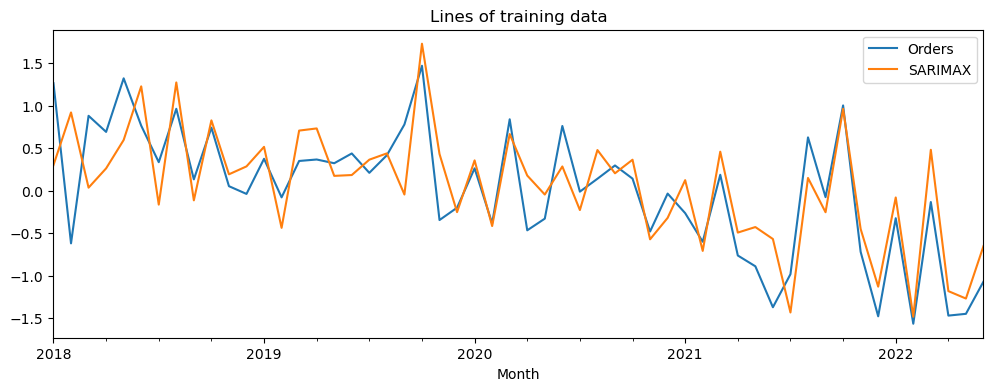

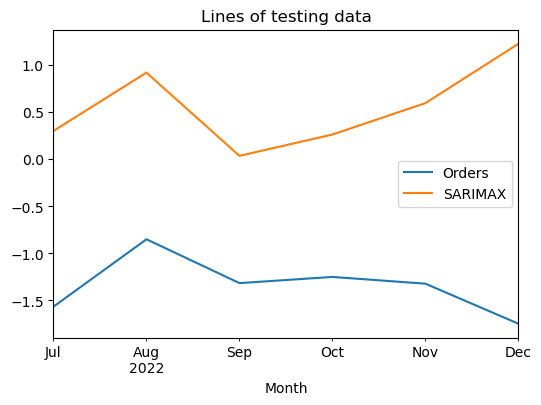

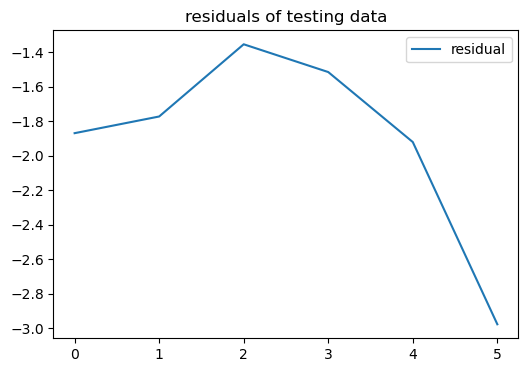

RMSE: 1.9706151197999147
MAD: 1.9006316599045363
MAPE: 144.59743465134352
AIC: 94.20346242664377
BIC: 135.57959261123833


In [31]:
model = SARIMAX(train_data['Orders'], exog=train_data[variables_list], 
        order=(5, 1, 5), seasonal_order=(2, 0, 0, 12)).fit() 
summary = model.summary()
print(summary) 
# ----------------------------------------------------------------------------------
yhat = model.predict(train_data.index[0], train_data.index[-1])
train_data['SARIMAX'] = yhat
train_data.plot.line('Month', ['Orders', 'SARIMAX'], figsize = (12,4))
# plt.xticks(rotation=90)
plt.title('Lines of training data')
plt.show()
# ----------------------------------------------------------------------------------
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])
test_data['SARIMAX'] = predictions
test_data.plot.line('Month', ['Orders', 'SARIMAX'], figsize = (6,4))
# plt.xticks(rotation=90)
plt.title('Lines of testing data')
plt.show()
# ----------------------------------------------------------------------------------
residuals = pd.DataFrame(test_data['Orders'] - predictions).rename(columns={0:'residual'}) # prediction - actual 
residuals.plot.line(figsize = (6,4))
plt.title('residuals of testing data')
plt.show()
# ----------------------------------------------------------------------------------
# Use the fitted model to make predictions on the testing data
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])
# Calculate the RMSE of the predictions
RMSE_SARIMAX = np.sqrt(mean_squared_error(test_data['Orders'], predictions))
# Calculate the MAD of the predictions
MAD_SARIMAX = mean_absolute_error(test_data['Orders'], predictions)
# Calculate the MAPE of the predictions
MAPE_SARIMAX = np.mean(np.abs((test_data['Orders'] - predictions) / test_data['Orders'])) * 100
# Extract the AIC of the model
AIC_SARIMAX = model.aic
# Extract the BIC of the model
BIC_SARIMAX = model.bic

print('RMSE:', RMSE_SARIMAX)
print('MAD:',  MAD_SARIMAX)
print('MAPE:', MAPE_SARIMAX)
print('AIC:', AIC_SARIMAX)
print('BIC:', BIC_SARIMAX)

# forecast = model.forecast(steps=5, exog=exo_forecast)
# print(forecast)

### VARMA

In [32]:
ts_column = 'Orders'
# variable_list = ['Orders', 'CPI', 'U RATE'] #should start with target variable
variable_list = ['Orders', 'CPI', 'FED FUNDS RATE', 'RETAIL SALES', 'U RATE', 'R GDP', 'H Total Sales', 'TCS', 'PPI']
# Created_Functions.VARMA_MODEL(standardized_data, ts_column, variable_list, 1, 1, 59, 5)

C:\Users\Ahmad\anaconda3_2.0\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                     Statespace Model Results                                                                    
Dep. Variable:     ['Orders', 'CPI', 'FED FUNDS RATE', 'RETAIL SALES', 'U RATE', 'R GDP', 'H Total Sales', 'TCS', 'PPI']   No. Observations:                   54
Model:                                                                                                            VMA(1)   Log Likelihood                -464.634
                                                                                                             + intercept   AIC                           1199.268
Date:                                                                                                   Sun, 19 Mar 2023   BIC                           1467.781
Time:                                                                                                           18:58:02   HQIC                          1302.823
Sample:                     

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_20124\502175826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['VARMA'] = yhat['Orders']


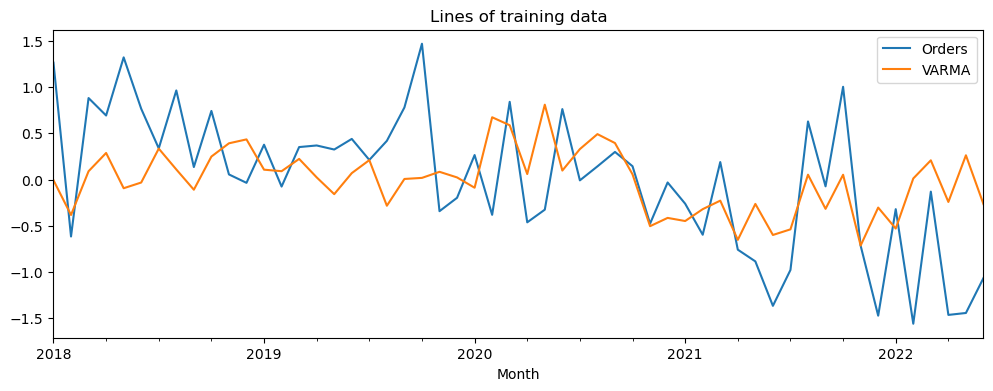

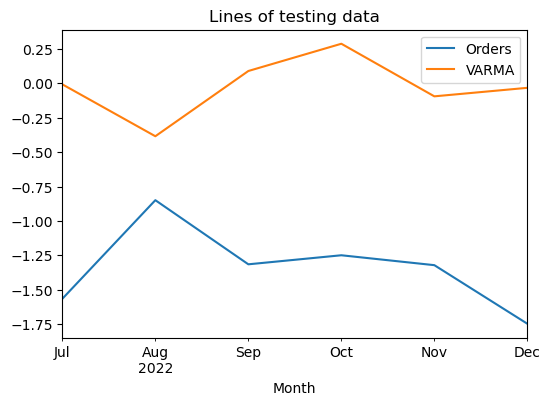

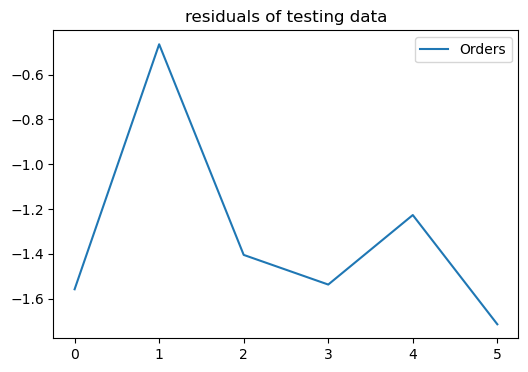

RMSE: 1.3800320551793201
MAD: 1.3178175217587944
MAPE: 95.84025437519225
AIC: 1199.2677107079037
BIC: 1467.7805569940806


In [33]:
model = VARMAX(train_data[variable_list], order=(0, 1)).fit()
summary = model.summary()
print(summary) 
# ----------------------------------------------------------------------------------
yhat = model.predict(train_data.index[0], train_data.index[-1])
train_data['VARMA'] = yhat['Orders']
train_data.plot.line('Month', ['Orders', 'VARMA'], figsize = (12,4))
# plt.xticks(rotation=90)
plt.title('Lines of training data')
plt.show()
# ----------------------------------------------------------------------------------
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])
test_data['VARMA'] = predictions['Orders']
test_data.plot.line('Month', ['Orders', 'VARMA'], figsize = (6,4))
# plt.xticks(rotation=90)
plt.title('Lines of testing data')
plt.show()
# ----------------------------------------------------------------------------------
residuals = pd.DataFrame(test_data['Orders'] - predictions['Orders']).rename(columns={0:'residual'})
residuals.plot.line(figsize = (6,4))
plt.title('residuals of testing data')
plt.show()
# ----------------------------------------------------------------------------------
# Use the fitted model to make predictions on the testing data
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])
# Calculate the RMSE of the predictions
RMSE_VARMA = np.sqrt(mean_squared_error(test_data['Orders'], predictions['Orders']))
# Calculate the MAD of the predictions
MAD_VARMA = mean_absolute_error(test_data['Orders'], predictions['Orders'])
# Calculate the MAPE of the predictions
MAPE_VARMA = np.mean(np.abs((test_data['Orders'] - predictions['Orders']) / test_data['Orders'])) * 100
# Extract the AIC of the model
AIC_VARMA = model.aic
# Extract the BIC of the model
BIC_VARMA = model.bic

print('RMSE:', RMSE_VARMA)
print('MAD:',  MAD_VARMA)
print('MAPE:', MAPE_VARMA)
print('AIC:', AIC_VARMA)
print('BIC:', BIC_VARMA)

# forecast = model.forecast(steps=5, exog=exo_forecast)
# print(forecast)

### VARMAX

In [34]:
# using TSModels py file
ts_column = 'Orders'
variable_list = ['Orders', 'CPI', 'FED FUNDS RATE'] #should start with target variable
exo_list = ['RETAIL SALES', 'U RATE', 'R GDP', 'H Total Sales', 'TCS', 'PPI']
# exo_forecast = pd.DataFrame({
#                             'FED FUNDS RATE': [.23, .24, .32, .50, .51],
#                              'RETAIL SALES': [-.15, -0.09, -0.08, .02, -.14],
#                              'R GDP': [0.06, 0.06, 0.06, 0.06, 0.06],
#                              'H Total Sales': [.49, .96, 1.74, -.67, .08]
#                             })
# Created_Functions.VARMAX_MODEL(standardized_data, ts_column, variable_list, exo_list, 1, 1, 59, 5 , exo_forecast)

C:\Users\Ahmad\anaconda3_2.0\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ahmad\AppData\Local\Temp\ipykernel_20124\2962832756.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['VARMAX'] = yhat['Orders']


                                    Statespace Model Results                                   
Dep. Variable:     ['Orders', 'CPI', 'FED FUNDS RATE']   No. Observations:                   54
Model:                                         VMAX(1)   Log Likelihood                -130.823
                                           + intercept   AIC                            333.646
Date:                                 Sun, 19 Mar 2023   BIC                            405.250
Time:                                         18:58:04   HQIC                           361.261
Sample:                                              0                                         
                                                  - 54                                         
Covariance Type:                                   opg                                         
Ljung-Box (L1) (Q):      6.13, 0.74, 15.18   Jarque-Bera (JB):     0.11, 1.36, 1.10
Prob(Q):                  0.01, 0.39, 0.00   Prob(JB

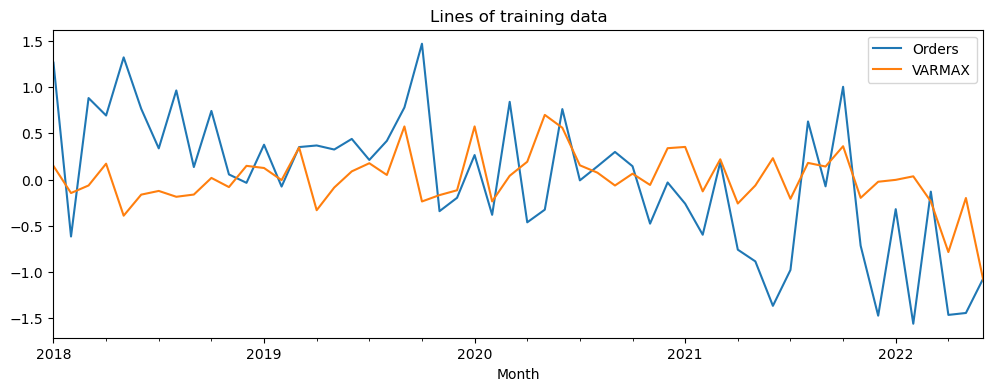

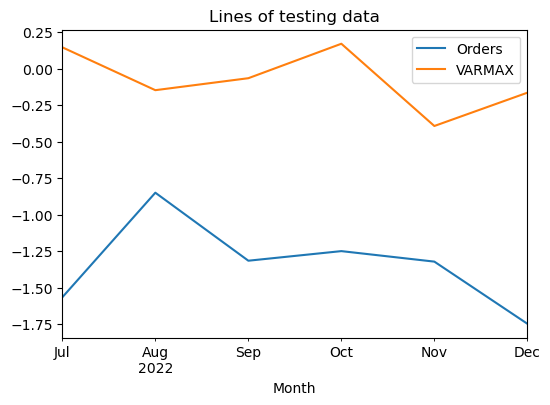

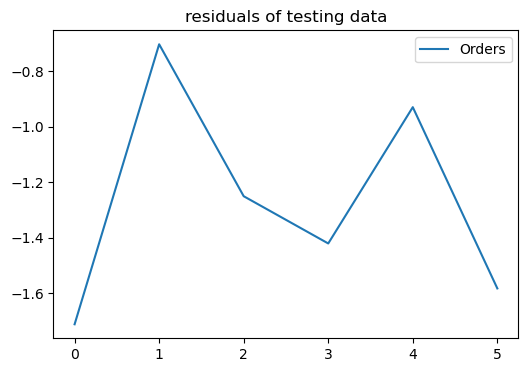

RMSE: 1.315405198878249
MAD: 1.2666579120359238
MAPE: 93.64368758485887
AIC: 333.6462803779538
BIC: 405.2497060542677


In [35]:
model = VARMAX(train_data[variable_list], exog=train_data[exo_list], order=(0, 1)).fit()
summary = model.summary()
print(summary) 
# ----------------------------------------------------------------------------------
yhat = model.predict(train_data.index[0], train_data.index[-1])
train_data['VARMAX'] = yhat['Orders']
train_data.plot.line('Month', ['Orders', 'VARMAX'], figsize = (12,4))
# plt.xticks(rotation=90)
plt.title('Lines of training data')
plt.show()
# ----------------------------------------------------------------------------------
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])
test_data['VARMAX'] = predictions['Orders']
test_data.plot.line('Month', ['Orders', 'VARMAX'], figsize = (6,4))
# plt.xticks(rotation=90)
plt.title('Lines of testing data')
plt.show()
# ----------------------------------------------------------------------------------
residuals = pd.DataFrame(test_data['Orders'] - predictions['Orders']).rename(columns={0:'residual'})
residuals.plot.line(figsize = (6,4))
plt.title('residuals of testing data')
plt.show()
# ----------------------------------------------------------------------------------
# Use the fitted model to make predictions on the testing data
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])
# Calculate the RMSE of the predictions
RMSE_VARMAX = np.sqrt(mean_squared_error(test_data['Orders'], predictions['Orders']))
# Calculate the MAD of the predictions
MAD_VARMAX = mean_absolute_error(test_data['Orders'], predictions['Orders'])
# Calculate the MAPE of the predictions
MAPE_VARMAX = np.mean(np.abs((test_data['Orders'] - predictions['Orders']) / test_data['Orders'])) * 100
# Extract the AIC of the model
AIC_VARMAX = model.aic
# Extract the BIC of the model
BIC_VARMAX = model.bic

print('RMSE:', RMSE_VARMAX)
print('MAD:',  MAD_VARMAX)
print('MAPE:', MAPE_VARMAX)
print('AIC:', AIC_VARMAX)
print('BIC:', BIC_VARMAX)

### Moving Average Forecast

                               SARIMAX Results                                
Dep. Variable:                 Orders   No. Observations:                   54
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -58.510
Date:                Sun, 19 Mar 2023   AIC                            123.020
Time:                        18:58:05   BIC                            128.987
Sample:                             0   HQIC                           125.322
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047      0.121      0.039      0.969      -0.233       0.242
ma.L1          0.2381      0.128      1.858      0.063      -0.013       0.489
sigma2         0.5107      0.119      4.305      0.0

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_20124\3712176942.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['MA'] = yhat


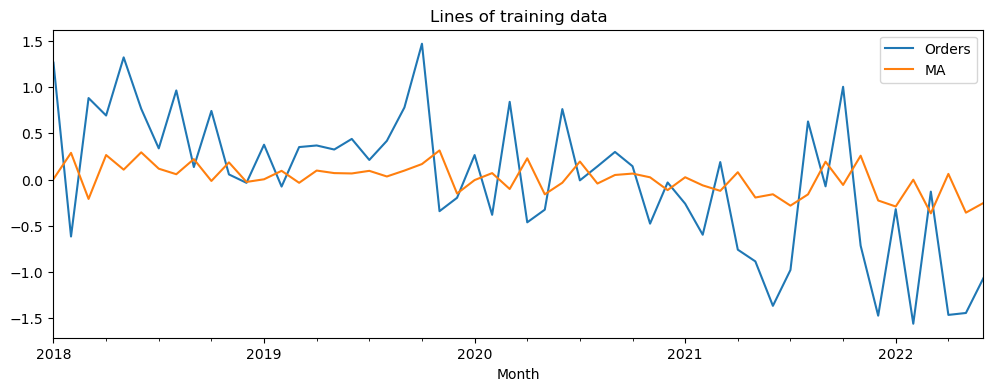

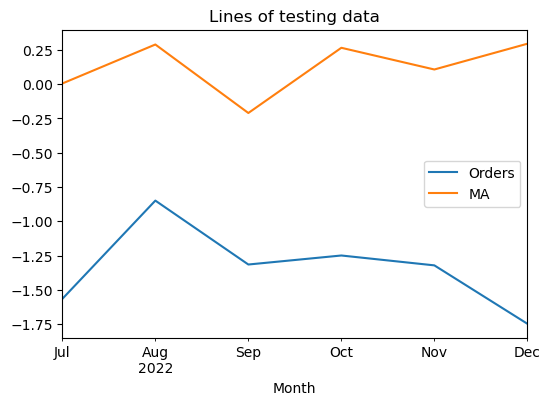

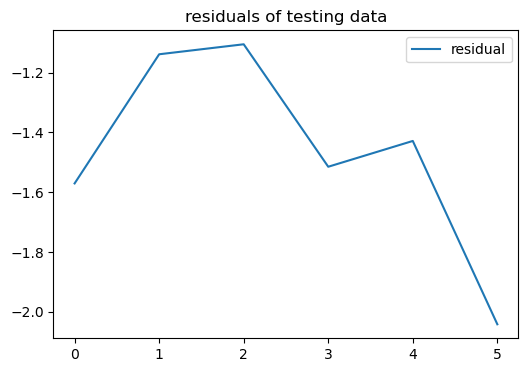

RMSE: 1.4992665399935468
MAD: 1.4664388320568944
MAPE: 110.7457589360279
AIC: 123.02034409984158
BIC: 128.9872962395344


In [36]:
model = ARIMA(train_data['Orders'], order=(0, 0, 1)).fit()
summary = model.summary()
print(summary) 
# ----------------------------------------------------------------------------------
yhat = model.predict(train_data.index[0], train_data.index[-1])
train_data['MA'] = yhat
train_data.plot.line('Month', ['Orders', 'MA'], figsize = (12,4))
# plt.xticks(rotation=90)
plt.title('Lines of training data')
plt.show()
# ----------------------------------------------------------------------------------
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])
test_data['MA'] = predictions
test_data.plot.line('Month', ['Orders', 'MA'], figsize = (6,4))
# plt.xticks(rotation=90)
plt.title('Lines of testing data')
plt.show()
# ----------------------------------------------------------------------------------
residuals = pd.DataFrame(test_data['Orders'] - predictions).rename(columns={0:'residual'})
residuals.plot.line(figsize = (6,4))
plt.title('residuals of testing data')
plt.show()
# ----------------------------------------------------------------------------------
# Use the fitted model to make predictions on the testing data
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])
# Calculate the RMSE of the predictions
RMSE_MA = np.sqrt(mean_squared_error(test_data['Orders'], predictions))
# Calculate the MAD of the predictions
MAD_MA = mean_absolute_error(test_data['Orders'], predictions)
# Calculate the MAPE of the predictions
MAPE_MA = np.mean(np.abs((test_data['Orders'] - predictions) / test_data['Orders'])) * 100
# Extract the AIC of the model
AIC_MA = model.aic
# Extract the BIC of the model
BIC_MA = model.bic

print('RMSE:', RMSE_MA)
print('MAD:',  MAD_MA)
print('MAPE:', MAPE_MA)
print('AIC:', AIC_MA)
print('BIC:', BIC_MA)

### ARMA

                               SARIMAX Results                                
Dep. Variable:                 Orders   No. Observations:                   54
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -52.187
Date:                Sun, 19 Mar 2023   AIC                            112.374
Time:                        18:58:05   BIC                            120.330
Sample:                             0   HQIC                           115.442
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0943      0.627     -0.150      0.880      -1.323       1.135
ar.L1          0.9762      0.062     15.682      0.000       0.854       1.098
ma.L1         -0.7865      0.144     -5.470      0.0

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_20124\4155542406.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['ARMA'] = yhat


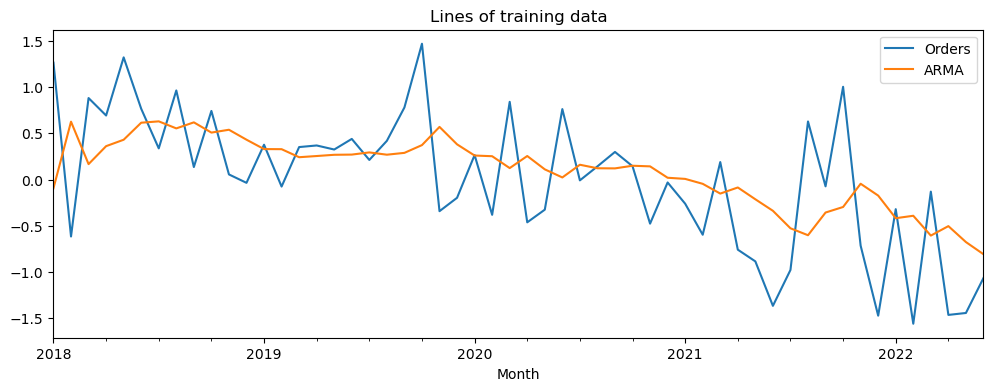

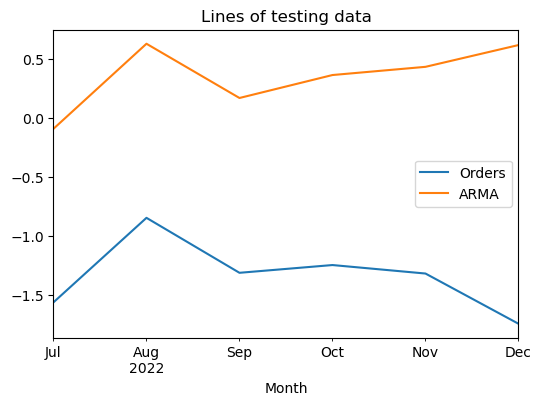

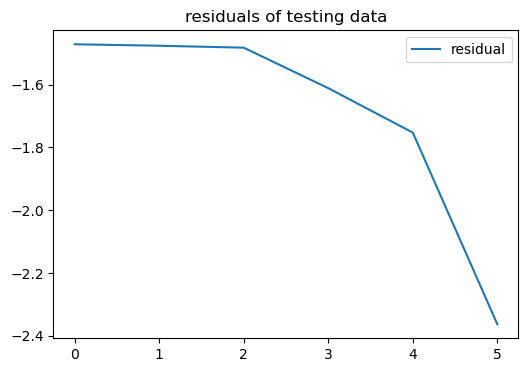

RMSE: 1.7220223001249737
MAD: 1.6927540225723268
MAPE: 129.53991497457056
AIC: 112.37383131483963
BIC: 120.32976750109674


In [37]:
model = ARIMA(train_data['Orders'], order=(1, 0, 1)).fit()
summary = model.summary()
print(summary) 
# ----------------------------------------------------------------------------------
yhat = model.predict(train_data.index[0], train_data.index[-1])
train_data['ARMA'] = yhat
train_data.plot.line('Month', ['Orders', 'ARMA'], figsize = (12,4))
# plt.xticks(rotation=90)
plt.title('Lines of training data')
plt.show()
# ----------------------------------------------------------------------------------
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])
test_data['ARMA'] = predictions
test_data.plot.line('Month', ['Orders', 'ARMA'], figsize = (6,4))
# plt.xticks(rotation=90)
plt.title('Lines of testing data')
plt.show()
# ----------------------------------------------------------------------------------
residuals = pd.DataFrame(test_data['Orders'] - predictions).rename(columns={0:'residual'})
residuals.plot.line(figsize = (6,4))
plt.title('residuals of testing data')
plt.show()
# ----------------------------------------------------------------------------------
# Use the fitted model to make predictions on the testing data
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])
# Calculate the RMSE of the predictions
RMSE_ARMA = np.sqrt(mean_squared_error(test_data['Orders'], predictions))
# Calculate the MAD of the predictions
MAD_ARMA = mean_absolute_error(test_data['Orders'], predictions)
# Calculate the MAPE of the predictions
MAPE_ARMA = np.mean(np.abs((test_data['Orders'] - predictions) / test_data['Orders'])) * 100
# Extract the AIC of the model
AIC_ARMA = model.aic
# Extract the BIC of the model
BIC_ARMA = model.bic

print('RMSE:', RMSE_ARMA)
print('MAD:',  MAD_ARMA)
print('MAPE:', MAPE_ARMA)
print('AIC:', AIC_ARMA)
print('BIC:', BIC_ARMA)

### SES: Not accurate

In [38]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                 Orders   No. Observations:                   54
Model:             SimpleExpSmoothing   SSE                             21.140
Optimized:                       True   AIC                            -46.642
Trend:                           None   BIC                            -42.664
Seasonal:                        None   AICC                           -45.826
Seasonal Periods:                None   Date:                 Sun, 19 Mar 2023
Box-Cox:                        False   Time:                         18:58:06
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1892447                alpha                 True
initial_level              0.5937546                

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_20124\2219251691.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['SES'] = pred


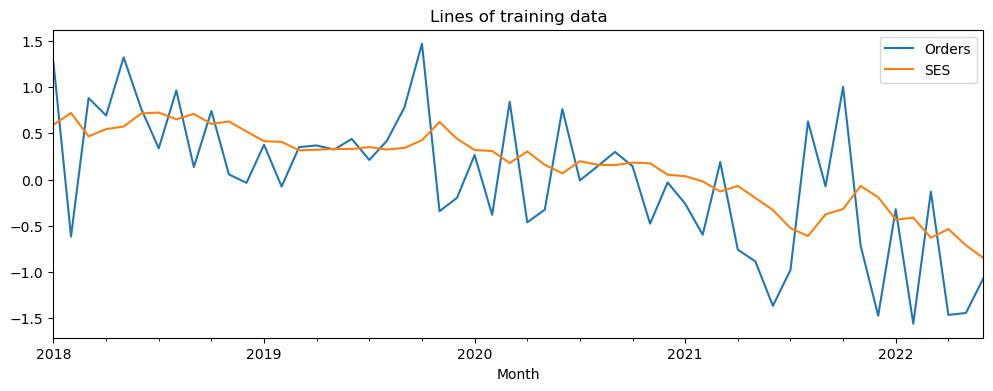

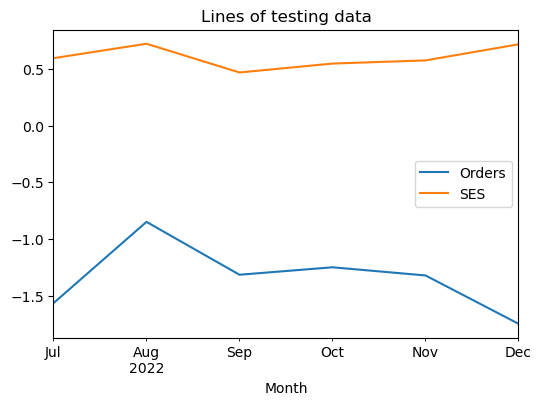

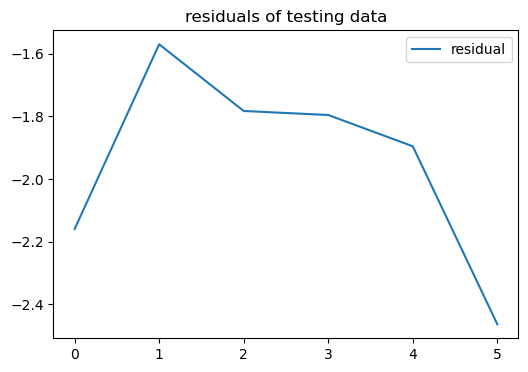

RMSE: 1.966199056707503
MAD: 1.9446355814504195
MAPE: 147.7499630024415
AIC: 112.37383131483963
BIC: 120.32976750109674


In [39]:
SES_Model = SimpleExpSmoothing(train_data['Orders']).fit()
summary = SES_Model.summary()
print(summary) 
# ----------------------------------------------------------------------------------
pred = SES_Model.predict(train_data.index[0], train_data.index[-1])
train_data['SES'] = pred
train_data.plot.line('Month', ['Orders', 'SES'], figsize = (12,4))
# plt.xticks(rotation=90)
plt.title('Lines of training data')
plt.show()
# ----------------------------------------------------------------------------------
predictions = SES_Model.predict(start=test_data.index[0], end=test_data.index[-1])
test_data['SES'] = predictions
test_data.plot.line('Month', ['Orders', 'SES'], figsize = (6,4))
# plt.xticks(rotation=90)
plt.title('Lines of testing data')
plt.show()
# ----------------------------------------------------------------------------------
residuals = pd.DataFrame(test_data['Orders'] - predictions).rename(columns={0:'residual'})
residuals.plot.line(figsize = (6,4))
plt.title('residuals of testing data')
plt.show()
# ----------------------------------------------------------------------------------
# Use the fitted model to make predictions on the testing data
predictions = SES_Model.predict(start=test_data.index[0], end=test_data.index[-1])
# Calculate the RMSE of the predictions
RMSE_SES = np.sqrt(mean_squared_error(test_data['Orders'], predictions))
# Calculate the MAD of the predictions
MAD_SES = mean_absolute_error(test_data['Orders'], predictions)
# Calculate the MAPE of the predictions
MAPE_SES = np.mean(np.abs((test_data['Orders'] - predictions) / test_data['Orders'])) * 100
# Extract the AIC of the model
AIC_SES = model.aic
# Extract the BIC of the model
BIC_SES = model.bic

print('RMSE:', RMSE_SES)
print('MAD:',  MAD_SES)
print('MAPE:', MAPE_SES)
print('AIC:', AIC_SES)
print('BIC:', BIC_SES)

### Auto Regression: Not Accurate

In [40]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
train_data = standardized_data[standardized_data['Month'] < '2022-01-01']
test_data = standardized_data[standardized_data['Month'] >= '2022-01-01']

In [42]:
test_data

Month    Orders       CPI  FED FUNDS RATE  RETAIL SALES    U RATE  \
48 2022-01-01 -0.321633  1.341245       -1.051018      0.793118 -0.345832   
49 2022-02-01 -1.563138  1.518725       -1.051018      1.957836 -0.489430   
50 2022-03-01 -0.131525  2.608962       -0.940948     -0.122018 -0.633027   
51 2022-04-01 -1.467614  0.631323       -0.821705      1.125894 -0.633027   
52 2022-05-01 -1.446734  2.000458       -0.418114     -1.037154 -0.633027   
53 2022-06-01 -1.067817  2.685025       -0.014523     -1.120348 -0.633027   
54 2022-07-01 -1.565782 -0.813875        0.416585     -0.038824 -0.704826   
55 2022-08-01 -0.849303 -0.889938        1.012799      0.377147 -0.561228   
56 2022-09-01 -1.315366 -0.230725        1.223767     -1.869095 -0.704826   
57 2022-10-01 -1.249637  0.251008        1.700738      1.541865 -0.561228   
58 2022-11-01 -1.321594 -1.042064        2.342814     -1.037154 -0.633027   
59 2022-12-01 -1.747332 -1.574505        2.636335     -1.453125 -0.704826   

       R GDP  H Total Sales       TCS       PPI  
48 -1.105023       1.132597  2.536456  2.110310  
49 -1.105023       0.050620  1.102117  0.960886  
50 -1.105023      -0.409140  0.468531  0.295163  
51 -0.725435      -1.499240  2.689940  0.159162  
52 -0.725435       0.224451  0.741024  0.163261  
53 -0.725435      -1.465936  1.137551  0.000989  
54  0.413329      -0.742181  2.449586  0.218572  
55  0.413329       1.226823  0.924596 -1.630282  
56  0.413329      -1.180820  0.511058 -0.015889  
57  0.286800       0.118852 -0.012411 -0.500530  
58  0.286800      -0.426198  0.515294  1.186295  
59  0.286800       0.689896  0.393260 -1.226350

                            AutoReg Model Results                             
Dep. Variable:                 Orders   No. Observations:                   48
Model:                     AutoReg(1)   Log Likelihood                 -45.122
Method:               Conditional MLE   S.D. of innovations              0.632
Date:                Sun, 19 Mar 2023   AIC                             96.244
Time:                        18:58:06   BIC                            101.795
Sample:                             1   HQIC                            98.333
                                   48                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0628      0.095      0.659      0.510      -0.124       0.249
Orders.L1      0.2490      0.146      1.700      0.089      -0.038       0.536
                                    Roots           

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_20124\2341968573.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['AR'] = yhat


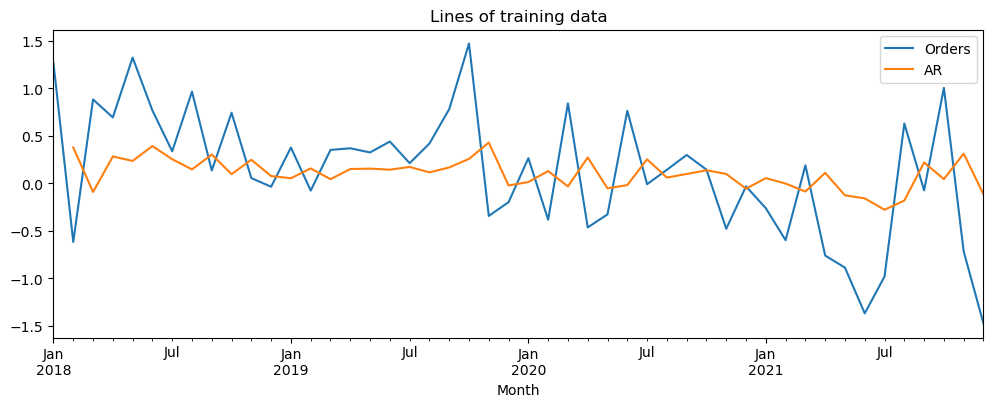

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_20124\2341968573.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['AR'] = predictions


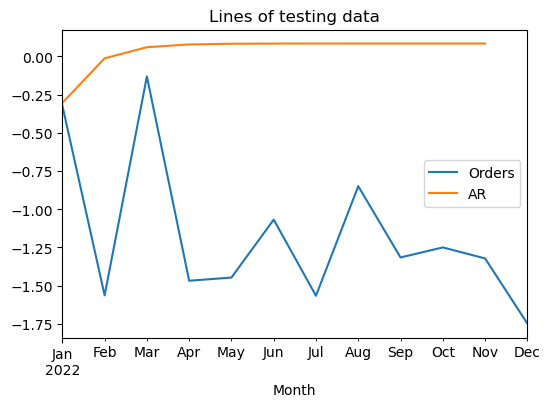

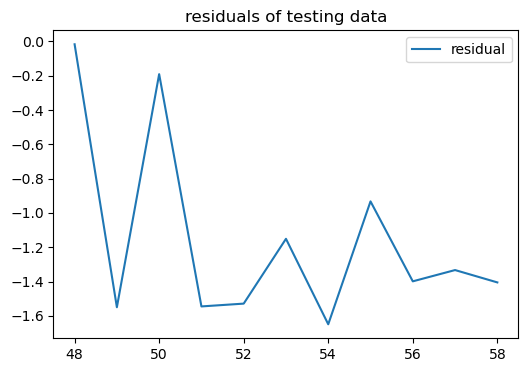

RMSE: 1.29961414078777
MAD: 1.1944897648483475
MAPE: 100.26713811735861
AIC: 96.24430533178071
BIC: 101.79474813691088


In [43]:
model = AutoReg(train_data['Orders'], lags=1).fit()
summary = model.summary()
print(summary) 
# ----------------------------------------------------------------------------------
yhat = model.predict(train_data.index[0], train_data.index[-1])
train_data['AR'] = yhat
train_data.plot.line('Month', ['Orders', 'AR'], figsize = (12,4))
# plt.xticks(rotation=90)
plt.title('Lines of training data')
plt.show()
# ----------------------------------------------------------------------------------
predictions = model.predict(start=47, end=58, dynamic=False)
test_data['AR'] = predictions
test_data.plot.line('Month', ['Orders', 'AR'], figsize = (6,4))
# plt.xticks(rotation=90)
plt.title('Lines of testing data')
plt.show()
# # ----------------------------------------------------------------------------------
residuals = pd.DataFrame(test_data['Orders'] - predictions).rename(columns={0:'residual'})
residuals.plot.line(figsize = (6,4))
plt.title('residuals of testing data')
plt.show()
# # ----------------------------------------------------------------------------------
# Use the fitted model to make predictions on the testing data
# predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])
# Calculate the RMSE of the predictions
RMSE_AR = np.sqrt(mean_squared_error(test_data['Orders'], predictions))
# Calculate the MAD of the predictions
MAD_AR = mean_absolute_error(test_data['Orders'], predictions)
# Calculate the MAPE of the predictions
MAPE_AR = np.mean(np.abs((test_data['Orders'] - predictions) / test_data['Orders'])) * 100
# Extract the AIC of the model
AIC_AR = model.aic
# Extract the BIC of the model
BIC_AR = model.bic

print('RMSE:', RMSE_AR)
print('MAD:',  MAD_AR)
print('MAPE:', MAPE_AR)
print('AIC:', AIC_AR)
print('BIC:', BIC_AR)

### ARIMA: Not Accurate

                               SARIMAX Results                                
Dep. Variable:                 Orders   No. Observations:                   48
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -44.750
Date:                Sun, 19 Mar 2023   AIC                             93.500
Time:                        18:58:07   BIC                             97.201
Sample:                             0   HQIC                            94.893
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8367      0.078    -10.687      0.000      -0.990      -0.683
sigma2         0.3832      0.090      4.263      0.000       0.207       0.559
Ljung-Box (L1) (Q):                   0.00   Jarque-

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_20124\1996442817.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['ARIMA'] = yhat


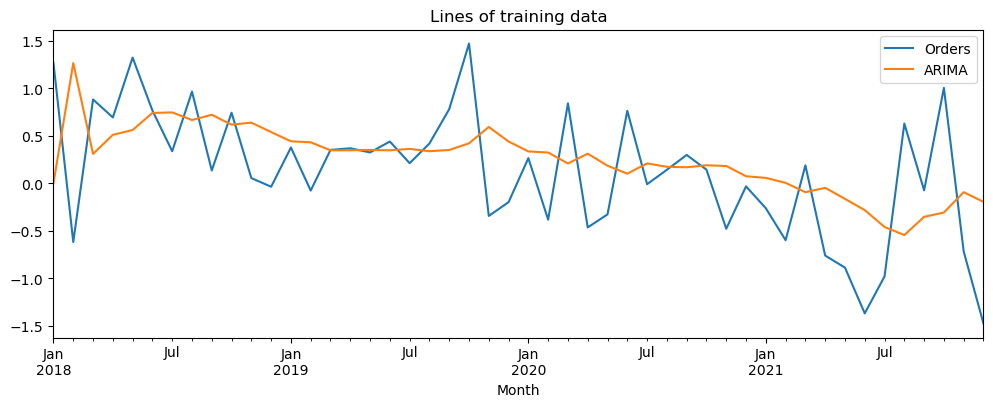

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_20124\1996442817.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ARIMA'] = predictions


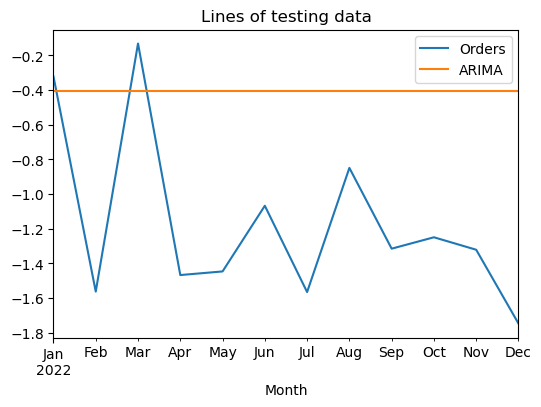

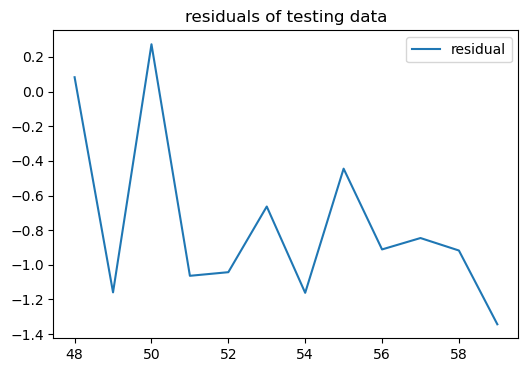

RMSE: 0.9046069795043491
MAD: 0.8256065041365641
MAPE: 76.96764560309123
AIC: 93.50041887023576
BIC: 97.20071407365587


In [44]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data['Orders'], order=(0, 1, 1)).fit()
summary = model.summary()
print(summary) 
# ----------------------------------------------------------------------------------
yhat = model.predict(train_data.index[0], train_data.index[-1])
train_data['ARIMA'] = yhat
train_data.plot.line('Month', ['Orders', 'ARIMA'], figsize = (12,4))
# plt.xticks(rotation=90)
plt.title('Lines of training data')
plt.show()
# ----------------------------------------------------------------------------------
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])
test_data['ARIMA'] = predictions
test_data.plot.line('Month', ['Orders', 'ARIMA'], figsize = (6,4))
# plt.xticks(rotation=90)
plt.title('Lines of testing data')
plt.show()
# ----------------------------------------------------------------------------------
residuals = pd.DataFrame(test_data['Orders'] - predictions).rename(columns={0:'residual'})
residuals.plot.line(figsize = (6,4))
plt.title('residuals of testing data')
plt.show()
# ----------------------------------------------------------------------------------
# Use the fitted model to make predictions on the testing data
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])
# Calculate the RMSE of the predictions
RMSE_ARIMA = np.sqrt(mean_squared_error(test_data['Orders'], predictions))
# Calculate the MAD of the predictions
MAD_ARIMA = mean_absolute_error(test_data['Orders'], predictions)
# Calculate the MAPE of the predictions
MAPE_ARIMA = np.mean(np.abs((test_data['Orders'] - predictions) / test_data['Orders'])) * 100
# Extract the AIC of the model
AIC_ARIMA = model.aic
# Extract the BIC of the model
BIC_ARIMA = model.bic

print('RMSE:', RMSE_ARIMA)
print('MAD:',  MAD_ARIMA)
print('MAPE:', MAPE_ARIMA)
print('AIC:', AIC_ARIMA)
print('BIC:', BIC_ARIMA)

### SARIMA

                                      SARIMAX Results                                      
Dep. Variable:                              Orders   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 12)   Log Likelihood                 -40.008
Date:                             Sun, 19 Mar 2023   AIC                             90.016
Time:                                     18:58:08   BIC                             99.266
Sample:                                          0   HQIC                            93.497
                                              - 48                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0595      0.224      0.266      0.790      -0.379       0.498
ma.L1         -0.8719      

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_20124\275806700.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['SARIMA'] = yhat


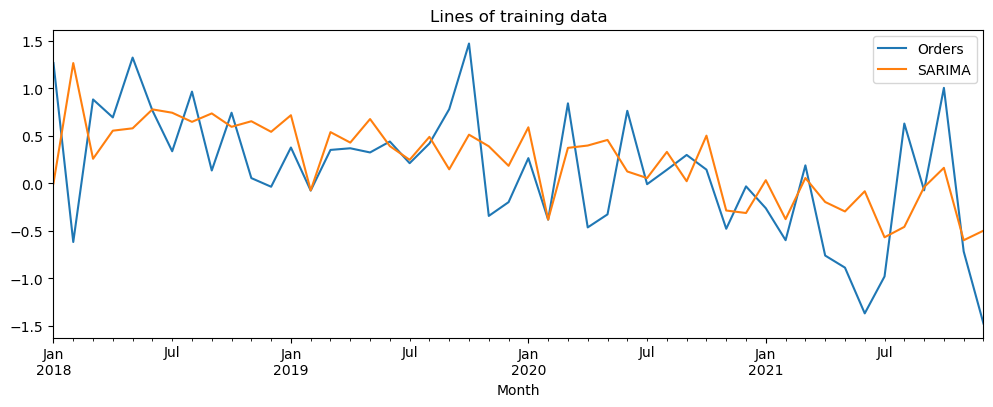

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_20124\275806700.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['SARIMA'] = predictions


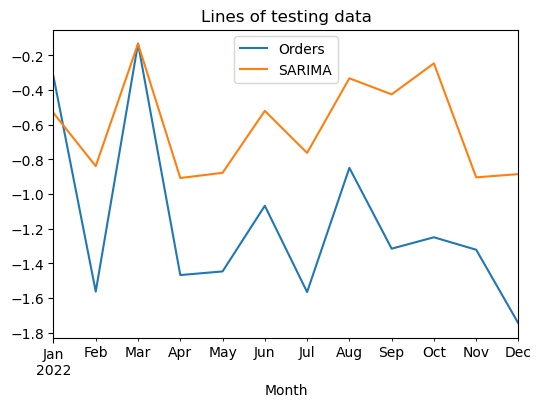

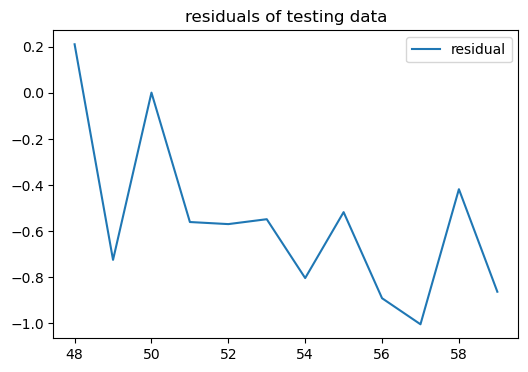

RMSE: 0.6542
MAD: 0.5922
MAPE: 48.556
AIC: 90.0157
BIC: 99.2664


In [45]:
# ts_column='Orders'
# Created_Functions.SARIMA_MODEL(standardized_data, ts_column, 1, 1, 1, 1, 1, 1, 12, 59, 3)
model = SARIMAX(train_data['Orders'], order=(1, 1, 1), seasonal_order=(2, 0, 0, 12)).fit() 
summary = model.summary()
print(summary) 
# ----------------------------------------------------------------------------------
yhat = model.predict(train_data.index[0], train_data.index[-1])
train_data['SARIMA'] = yhat
train_data.plot.line('Month', ['Orders', 'SARIMA'], figsize = (12,4))
# plt.xticks(rotation=90)
plt.title('Lines of training data')
plt.show()
# ----------------------------------------------------------------------------------
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])
test_data['SARIMA'] = predictions
test_data.plot.line('Month', ['Orders', 'SARIMA'], figsize = (6,4))
# plt.xticks(rotation=90)
plt.title('Lines of testing data')
plt.show()
# ----------------------------------------------------------------------------------
residuals = pd.DataFrame(test_data['Orders'] - predictions).rename(columns={0:'residual'})
residuals.plot.line(figsize = (6,4))
plt.title('residuals of testing data')
plt.show()
# ----------------------------------------------------------------------------------
# Use the fitted model to make predictions on the testing data
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])
# Calculate the RMSE of the predictions
RMSE_SARIMA = np.sqrt(mean_squared_error(test_data['Orders'], predictions))
# Calculate the MAD of the predictions
MAD_SARIMA = mean_absolute_error(test_data['Orders'], predictions)
# Calculate the MAPE of the predictions
MAPE_SARIMA = np.mean(np.abs((test_data['Orders'] - predictions) / test_data['Orders'])) * 100
# Extract the AIC of the model
AIC_SARIMA = model.aic
# Extract the BIC of the model
BIC_SARIMA = model.bic

print('RMSE:', round(RMSE_SARIMA, 4))
print('MAD:',  round(MAD_SARIMA, 4))
print('MAPE:', round(MAPE_SARIMA, 4))
print('AIC:', round(AIC_SARIMA, 4))
print('BIC:', round(BIC_SARIMA, 4))

### Holts Winters (using split data)

                       ExponentialSmoothing Model Results                       
Dep. Variable:                   Orders   No. Observations:                   48
Model:             ExponentialSmoothing   SSE                              7.267
Optimized:                         True   AIC                            -58.619
Trend:                         Additive   BIC                            -28.680
Seasonal:                      Additive   AICC                           -35.033
Seasonal Periods:                    12   Date:                 Sun, 19 Mar 2023
Box-Cox:                          False   Time:                         18:58:09
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level              1.4901e-08                alpha                 True
smoothing_trend          

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_20124\3994277723.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['HW'] = yhat


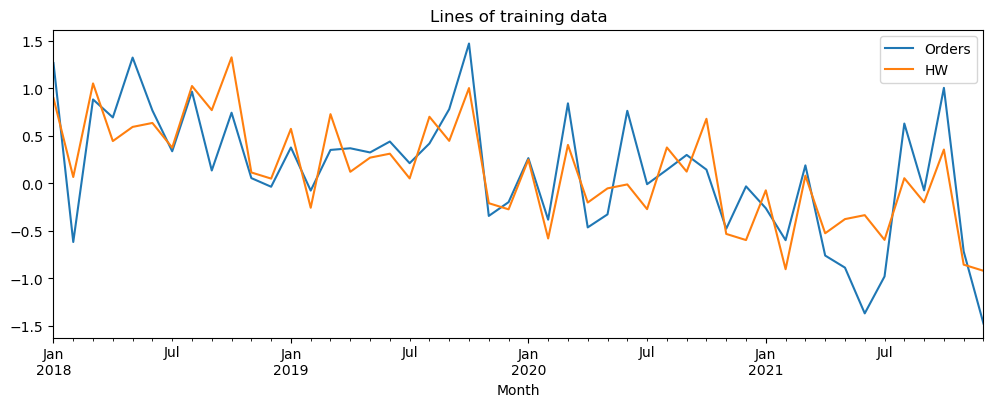

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_20124\3994277723.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['HW'] = predictions


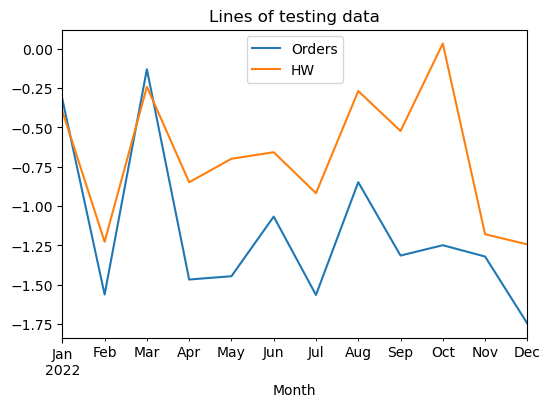

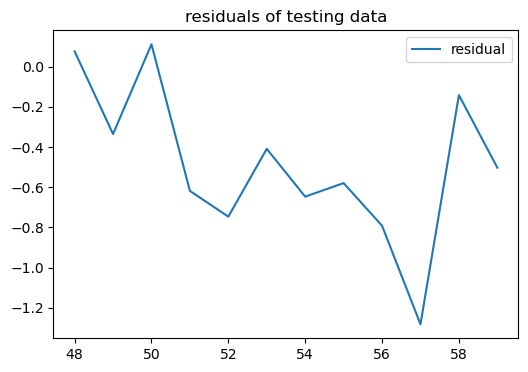

RMSE: 0.6147
MAD: 0.52
MAPE: 47.7691
AIC: -58.6193
BIC: -28.6801


In [46]:
# ts_column='Orders'
# Created_Functions.HW_MODEL(standardized_data, ts_column, 12, 59, 3)
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train_data['Orders'], trend = 'add', seasonal='add', seasonal_periods=12).fit()
summary = model.summary()
print(summary) 
# ----------------------------------------------------------------------------------
yhat = model.predict(train_data.index[0], train_data.index[-1])
train_data['HW'] = yhat
train_data.plot.line('Month', ['Orders', 'HW'], figsize = (12,4))
# plt.xticks(rotation=90)
plt.title('Lines of training data')
plt.show()
# ----------------------------------------------------------------------------------
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])
test_data['HW'] = predictions
test_data.plot.line('Month', ['Orders', 'HW'], figsize = (6,4))
# plt.xticks(rotation=90)
plt.title('Lines of testing data')
plt.show()
# ----------------------------------------------------------------------------------
residuals = pd.DataFrame(test_data['Orders'] - predictions).rename(columns={0:'residual'})
residuals.plot.line(figsize = (6,4))
plt.title('residuals of testing data')
plt.show()
# ----------------------------------------------------------------------------------
# Use the fitted model to make predictions on the testing data
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])
# Calculate the RMSE of the predictions
RMSE_HW = np.sqrt(mean_squared_error(test_data['Orders'], predictions))
# Calculate the MAD of the predictions
MAD_HW = mean_absolute_error(test_data['Orders'], predictions)
# Calculate the MAPE of the predictions
MAPE_HW = np.mean(np.abs((test_data['Orders'] - predictions) / test_data['Orders'])) * 100
# Extract the AIC of the model
AIC_HW = model.aic
# Extract the BIC of the model
BIC_HW = model.bic

print('RMSE:', round(RMSE_HW, 4))
print('MAD:',  round(MAD_HW, 4))
print('MAPE:', round(MAPE_HW, 4))
print('AIC:', round(AIC_HW, 4))
print('BIC:', round(BIC_HW, 4))

### Metrics of Models 

In [47]:
# comparing the errors
metrics = {'MA': [RMSE_MA, MAD_MA, MAPE_MA, AIC_MA, BIC_MA], 
           'ARMA': [RMSE_ARMA, MAD_ARMA, MAPE_ARMA, AIC_ARMA, BIC_ARMA], 
           'SES': [RMSE_SES, MAD_SES, MAPE_SES, AIC_SES, BIC_SES], 
           "AutoReg": [RMSE_AR, MAD_AR, MAPE_AR, AIC_AR, BIC_AR], 
           "ARIMA": [RMSE_ARIMA, MAD_ARIMA, MAPE_ARIMA, AIC_ARIMA, BIC_ARIMA],
           "SARIMA": [RMSE_SARIMA, MAD_SARIMA, MAPE_SARIMA, AIC_SARIMA, BIC_SARIMA], 
           "HW": [RMSE_HW, MAD_HW, MAPE_HW, AIC_HW, BIC_HW],  
          "SARIMAX": [RMSE_SARIMAX, MAD_SARIMAX, MAPE_SARIMAX, AIC_SARIMAX, BIC_SARIMAX], 
           "VARMA": [RMSE_VARMA, MAD_VARMA, MAPE_VARMA, AIC_VARMA, BIC_VARMA], 
           "VARMAX": [RMSE_VARMAX, MAD_VARMAX, MAPE_VARMAX, AIC_VARMAX, BIC_VARMAX]}

Metrics = pd.DataFrame.from_dict(metrics).round(3)

# # Assign column names to Metrics dataframe
# Metrics.columns = ['MA','ARMA', 'SES', 'AutoReg', 'ARIMA', 'SARIMA', 'Holts Winters', 'ANN', 'LSTM', 'SARIMAX', 'VARMA', 'VARMAX']
Metrics.index = ['RMSE', 'MAD', 'MAPE', 'AIC', 'BIC']
Metrics.head()

MA     ARMA      SES  AutoReg   ARIMA  SARIMA      HW  SARIMAX  \
RMSE    1.499    1.722    1.966    1.300   0.905   0.654   0.615    1.971   
MAD     1.466    1.693    1.945    1.194   0.826   0.592   0.520    1.901   
MAPE  110.746  129.540  147.750  100.267  76.968  48.556  47.769  144.597   
AIC   123.020  112.374  112.374   96.244  93.500  90.016 -58.619   94.203   
BIC   128.987  120.330  120.330  101.795  97.201  99.266 -28.680  135.580   

         VARMA   VARMAX  
RMSE     1.380    1.315  
MAD      1.318    1.267  
MAPE    95.840   93.644  
AIC   1199.268  333.646  
BIC   1467.781  405.250

### Forecasting

## Holts Winters

In [48]:
standardized_data = pd.read_csv('standardized_data.csv')
standardized_data['Month'] = pd.to_datetime(standardized_data['Month'])

# standardized_data.info()

In [49]:
standardized_data.head()

Month    Orders       CPI  FED FUNDS RATE  RETAIL SALES    U RATE  \
0 2018-01-01  1.266171  0.580615        0.168927     -0.870765 -0.345832   
1 2018-02-01 -0.617705  0.352425        0.178100     -0.205212 -0.274033   
2 2018-03-01  0.882906 -0.205370        0.260652     -0.038824 -0.345832   
3 2018-04-01  0.693607  0.225654        0.425758      1.042700 -0.345832   
4 2018-05-01  1.323791  0.276362        0.434930     -0.787571 -0.489430   

    R GDP  H Total Sales       TCS       PPI  
0  0.2868       0.476262  0.672913  1.073900  
1  0.2868       0.949831 -0.557547  0.956924  
2  0.2868       1.739382  1.971871 -1.297400  
3  0.2868      -0.681259 -0.762165  0.305901  
4  0.2868       0.067678 -0.065998  0.027320

                       ExponentialSmoothing Model Results                       
Dep. Variable:                   Orders   No. Observations:                   60
Model:             ExponentialSmoothing   SSE                             10.001
Optimized:                         True   AIC                            -75.500
Trend:                         Additive   BIC                            -41.991
Seasonal:                      Additive   AICC                           -58.817
Seasonal Periods:                    12   Date:                 Sun, 19 Mar 2023
Box-Cox:                          False   Time:                         18:58:09
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1093507                alpha                 True
smoothing_trend          

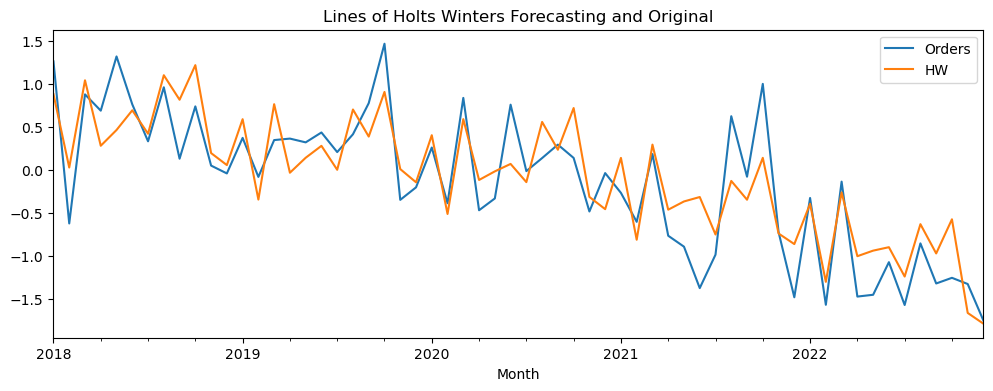

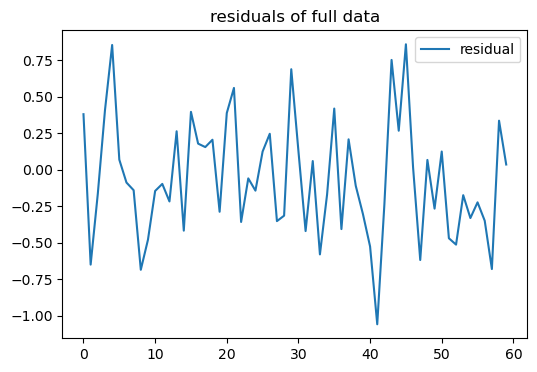

RMSE: 0.4083
MAD: 0.3372
MAPE: 129.7614
AIC: -75.5001
BIC: -41.9906


In [50]:
# ts_column='Orders'
# Created_Functions.HW_MODEL(standardized_data, ts_column, 12, 59, 3)
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(standardized_data['Orders'], trend = 'add', seasonal='add', seasonal_periods=12).fit()
summary = model.summary()
print(summary) 
# ----------------------------------------------------------------------------------
yhat = model.predict(standardized_data.index[0], standardized_data.index[-1])
standardized_data['HW'] = yhat
standardized_data.plot.line('Month', ['Orders', 'HW'], figsize = (12,4))
# plt.xticks(rotation=90)
plt.title('Lines of Holts Winters Forecasting and Original')
plt.show()
# ----------------------------------------------------------------------------------
residuals = pd.DataFrame(standardized_data['Orders'] - yhat).rename(columns={0:'residual'})
residuals.plot.line(figsize = (6,4))
plt.title('residuals of full data')
plt.show()
# ----------------------------------------------------------------------------------
# Use the fitted model to make predictions on the testing data
predictions = model.predict(start=standardized_data.index[0], end=standardized_data.index[-1])
# Calculate the RMSE of the predictions
RMSE_HW = np.sqrt(mean_squared_error(standardized_data['Orders'], predictions))
# Calculate the MAD of the predictions
MAD_HW = mean_absolute_error(standardized_data['Orders'], predictions)
# Calculate the MAPE of the predictions
MAPE_HW = np.mean(np.abs((standardized_data['Orders'] - predictions) / standardized_data['Orders'])) * 100
# Extract the AIC of the model
AIC_HW = model.aic
# Extract the BIC of the model
BIC_HW = model.bic

print('RMSE:', round(RMSE_HW, 4))
print('MAD:',  round(MAD_HW, 4))
print('MAPE:', round(MAPE_HW, 4))
print('AIC:', round(AIC_HW, 4))
print('BIC:', round(BIC_HW, 4))

In [51]:
# 3 months ahead 
print('\n\nNext Three Months Forecast:',)
hw_order_pred = round(model.predict(60,62),3)
hw_order_pred



Next Three Months Forecast:


60   -1.272
61   -2.217
62   -1.175
dtype: float64

## Saving the Model

In [52]:
import pickle

with open('holt_winters_model.pkl', 'wb') as h:
    pickle.dump(model, h)


## SARIMA(1,1,1)x(2,0,0,12)

                                      SARIMAX Results                                      
Dep. Variable:                              Orders   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 12)   Log Likelihood                 -46.584
Date:                             Sun, 19 Mar 2023   AIC                            103.169
Time:                                     18:58:10   BIC                            113.556
Sample:                                          0   HQIC                           107.224
                                              - 60                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0073      0.217      0.034      0.973      -0.417       0.432
ma.L1         -0.7997      

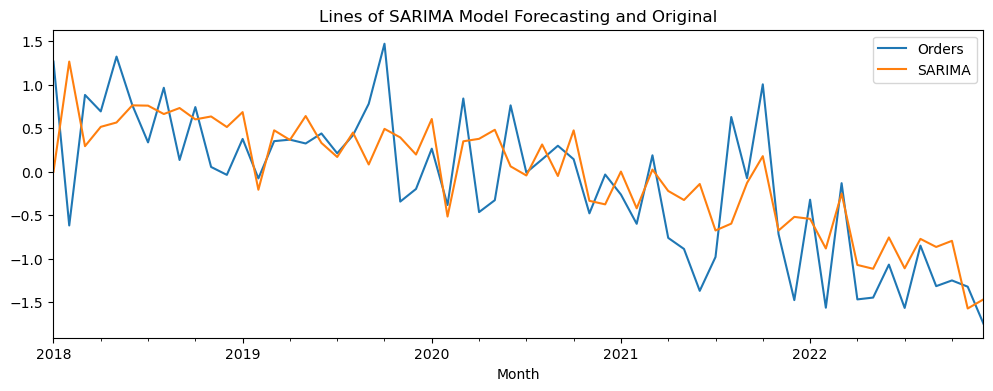

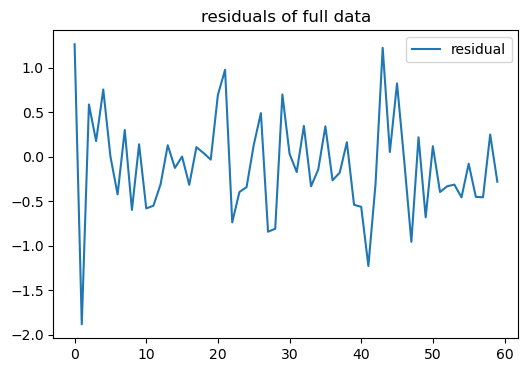

RMSE: 0.5702
MAD: 0.4369
MAPE: 145.8346
AIC: 103.1688
BIC: 113.5565


In [53]:
# ts_column='Orders'
# Created_Functions.SARIMA_MODEL(standardized_data, ts_column, 1, 1, 1, 1, 1, 1, 12, 59, 3)
model = SARIMAX(standardized_data['Orders'], order=(1, 1, 1), seasonal_order=(2, 0, 0, 12)).fit() 
summary = model.summary()
print(summary) 
# ----------------------------------------------------------------------------------
yhat = model.predict(standardized_data.index[0], standardized_data.index[-1])
standardized_data['SARIMA'] = yhat
standardized_data.plot.line('Month', ['Orders', 'SARIMA'], figsize = (12,4))
# plt.xticks(rotation=90)
plt.title('Lines of SARIMA Model Forecasting and Original')
plt.show()
# ----------------------------------------------------------------------------------
residuals = pd.DataFrame(standardized_data['Orders'] - yhat).rename(columns={0:'residual'})
residuals.plot.line(figsize = (6,4))
plt.title('residuals of full data')
plt.show()
# ----------------------------------------------------------------------------------
# Use the fitted model to make predictions on the testing data
predictions = model.predict(start=standardized_data.index[0], end=standardized_data.index[-1])
# Calculate the RMSE of the predictions
RMSE_SARIMA = np.sqrt(mean_squared_error(standardized_data['Orders'], predictions))
# Calculate the MAD of the predictions
MAD_SARIMA = mean_absolute_error(standardized_data['Orders'], predictions)
# Calculate the MAPE of the predictions
MAPE_SARIMA = np.mean(np.abs((standardized_data['Orders'] - predictions) / standardized_data['Orders'])) * 100
# Extract the AIC of the model
AIC_SARIMA = model.aic
# Extract the BIC of the model
BIC_SARIMA = model.bic

print('RMSE:', round(RMSE_SARIMA, 4))
print('MAD:',  round(MAD_SARIMA, 4))
print('MAPE:', round(MAPE_SARIMA, 4))
print('AIC:', round(AIC_SARIMA, 4))
print('BIC:', round(BIC_SARIMA, 4))

In [54]:
# 3 months ahead 
print('\n\nNext Three Months Forecast:',)
sarima_order_pred = round(model.predict(60,62),3)
sarima_order_pred



Next Three Months Forecast:


60   -1.384
61   -1.822
62   -1.119
Name: predicted_mean, dtype: float64

## Save the Model

In [55]:
import pickle

with open('Sarima_model.pkl', 'wb') as s:
    pickle.dump(model, s)

In [56]:
standardized_data.tail()

Month    Orders       CPI  FED FUNDS RATE  RETAIL SALES    U RATE  \
55 2022-08-01 -0.849303 -0.889938        1.012799      0.377147 -0.561228   
56 2022-09-01 -1.315366 -0.230725        1.223767     -1.869095 -0.704826   
57 2022-10-01 -1.249637  0.251008        1.700738      1.541865 -0.561228   
58 2022-11-01 -1.321594 -1.042064        2.342814     -1.037154 -0.633027   
59 2022-12-01 -1.747332 -1.574505        2.636335     -1.453125 -0.704826   

       R GDP  H Total Sales       TCS       PPI        HW    SARIMA  
55  0.413329       1.226823  0.924596 -1.630282 -0.625959 -0.771989  
56  0.413329      -1.180820  0.511058 -0.015889 -0.966137 -0.864736  
57  0.286800       0.118852 -0.012411 -0.500530 -0.569257 -0.794443  
58  0.286800      -0.426198  0.515294  1.186295 -1.657835 -1.572327  
59  0.286800       0.689896  0.393260 -1.226350 -1.783236 -1.467470

### Putting the Prediction from the Best Models in dataframe

In [57]:
# Create a new DataFrame with the predicted values
pred_data = pd.concat([hw_order_pred, sarima_order_pred], axis=1)
pred_data.columns = ['HW_Order_Pred', 'SARIMA_Order_Pred']
pred_data.index = pd.date_range(start='2023-01-01', periods=len(pred_data), freq='MS')

In [58]:
pred_data = pred_data.reset_index(drop=True)
pred_data.index = pred_data.index + 60
pred_data['Month'] = pd.date_range(start='2023-01-01', periods=len(pred_data), freq='MS')
#pred_data

In [59]:
# Create a DataFrame with the predicted values and corresponding dates
pred_dates = pd.date_range(start='2023-01-01', periods=3, freq='MS')
pred_data = pd.DataFrame({'Month': pred_dates, 'HW': hw_order_pred, 'SARIMA': sarima_order_pred})

pred_data

Month     HW  SARIMA
60 2023-01-01 -1.272  -1.384
61 2023-02-01 -2.217  -1.822
62 2023-03-01 -1.175  -1.119

In [60]:
# Add the predicted values to the standardized_data DataFrame
standardized_data = pd.concat([standardized_data, pred_data])
standardized_data

Month    Orders       CPI  FED FUNDS RATE  RETAIL SALES    U RATE  \
0  2018-01-01  1.266171  0.580615        0.168927     -0.870765 -0.345832   
1  2018-02-01 -0.617705  0.352425        0.178100     -0.205212 -0.274033   
2  2018-03-01  0.882906 -0.205370        0.260652     -0.038824 -0.345832   
3  2018-04-01  0.693607  0.225654        0.425758      1.042700 -0.345832   
4  2018-05-01  1.323791  0.276362        0.434930     -0.787571 -0.489430   
..        ...       ...       ...             ...           ...       ...   
58 2022-11-01 -1.321594 -1.042064        2.342814     -1.037154 -0.633027   
59 2022-12-01 -1.747332 -1.574505        2.636335     -1.453125 -0.704826   
60 2023-01-01       NaN       NaN             NaN           NaN       NaN   
61 2023-02-01       NaN       NaN             NaN           NaN       NaN   
62 2023-03-01       NaN       NaN             NaN           NaN       NaN   

     R GDP  H Total Sales       TCS       PPI        HW    SARIMA  
0   0.2868       0.476262  0.672913  1.073900  0.885502  0.000000  
1   0.2868       0.949831 -0.557547  0.956924  0.032346  1.266171  
2   0.2868       1.739382  1.971871 -1.297400  1.046547  0.293991  
3   0.2868      -0.681259 -0.762165  0.305901  0.285544  0.516073  
4   0.2868       0.067678 -0.065998  0.027320  0.468801  0.566198  
..     ...            ...       ...       ...       ...       ...  
58  0.2868      -0.426198  0.515294  1.186295 -1.657835 -1.572327  
59  0.2868       0.689896  0.393260 -1.226350 -1.783236 -1.467470  
60     NaN            NaN       NaN       NaN -1.272000 -1.384000  
61     NaN            NaN       NaN       NaN -2.217000 -1.822000  
62     NaN            NaN       NaN       NaN -1.175000 -1.119000  

[63 rows x 12 columns]

#### Forecasting Line Chart

In [61]:
fig = px.line(standardized_data, x='Month', y=['Orders', 'HW', 'SARIMA'],
              labels={
                     "value": "Orders", "index": "Date"
                 })
fig.update_layout(title_text="Alto Sales Prediction", title_x = 0.5)

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=standardized_data['Month'][::6], # every 6th month
        ticktext=standardized_data['Month'][::6].dt.strftime('%b %Y') # format as abbreviated month and year
    )
)

fig.add_vline(x='2022-12-02', line_width=3, line_dash="dash", line_color="grey")


# Show plot 
fig.show()